[View in Colaboratory](https://colab.research.google.com/github/norotime/classification_of_iris/blob/master/hands_on_classification_of_iris.ipynb)

# **ハンズオン「アヤメの分類」**

## ゴール「機械学習でアヤメを分類する」

機械学習プログラムを活用して

*   がく片の長さ
*   がく片の幅
*   花びらの長さ
*   花びらの幅

から3種類のアヤメを分類します。

実際の3種類の花はこちらです。
https://en.wikipedia.org/wiki/Iris_flower_data_set

## はじめに
開発環境としてGoogle Colabを使います。これを使えば、Jupyter Notebookをクラウド上で使用できます。


---


### Google Colabの使い方
セルと言う四角をクリックして選択し、そこにコードを書きます。**Shift + Enter**でセル内のコードを実行することもできます。  
下の例を参考にして「Hello World!」を表示させてみましょう。

In [20]:
# 例
print("Hi everybody!")

Hi everybody!


In [2]:
#『問題』上の例と同じようにコードを打ち込んで　Hello World!　と表示させてください。


### 環境構築

In [21]:
# 解説
import matplotlib as mpl

# 解説
!apt-get -y install fonts-ipaexfont

# フォントをSans serifにする
font = {"family":"IPAexGothic"}

# 解説
mpl.rc('font', **font)

# 解説
mpl.font_manager._rebuild()

# 解説
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipaexfont is already the newest version (00301-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [25]:
#計算&表の編集ツール
import pandas as pd

# 解説
import numpy as np

# 可視化ツール
import matplotlib.pyplot as plt

# 解説
import matplotlib

# 解説
matplotlib.font_manager._rebuild()

# 分類するためのツール
import warnings

# 解説
warnings.filterwarnings('ignore')

# 解説
from sklearn.neural_network import MLPClassifier as Deeplearning

#　その他
import warnings

# 解説
warnings.filterwarnings('ignore')

#データセット(このセルではツールの中にあるデータセットを読み込んでいます。)
from sklearn.datasets import load_iris

# 解説
from sklearn.model_selection import train_test_split

# 解説
iris = load_iris()

# 解説
iris_data = pd.DataFrame(
    # 解説
    iris.data, columns=[
          "Sepal Length（がく片の長さ）"
        , "Sepal Width（がく片の幅）"
        , "Petal Length（花びらの長さ）"
        , "Petal Width（花びらの幅）"
    ]
)

# 解説
iris_target = pd.DataFrame(
    # 解説
    iris.target, columns = ["種類"]
)

# 解説
iris = iris_data.join(iris_target)

## データの読み込み
分析する前に、下記の3つの観点でデータを目視確認しましょう。  

---

1.   データ数
2.   データ型
3.   データの内容

In [26]:
# @title デフォルトのタイトル テキスト
#　.head(X)　を使うとデータの上からX番目までのデータを表示できます。
iris.head(151) 


,Sepal Length（がく片の長さ）,Sepal Width（がく片の幅）,Petal Length（花びらの長さ）,Petal Width（花びらの幅）,種類
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
# 変数名.describe()を使うことでデータの数や平均値、中央値などがわかります。
iris.describe()

,Sepal Length（がく片の長さ）,Sepal Width（がく片の幅）,Petal Length（花びらの長さ）,Petal Width（花びらの幅）,種類
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


データを確認すると、花の特徴を表す数値がそれぞれ4種類（がく片の長さと幅、花びらの長さと幅）150本分のデータだとわかります。
種類の列には0,1,2の3種類のデータが入っていて、それぞれの数字は以下の３種類のアヤメを表しています。  

0 = iris-setosa  
1 = iris-versicolor  
2 = iris-verginica

ここで、データセットを二つに分け、片方を既に得られているデータ、もう片方を未知のデータに見立てます。  
そして機械学習プログラムに、片方のデータを学習させて、未知のデータを予測していきます。学習させるデータは **`x_train`** **`y_train`** は訓練データの組（`x_train`は４つの特徴量、`y_train`は正解データ）です。  
テストデータは**y_train**,**y_test**の組です。

In [7]:
#  列の名前が長いので、列名を変えています。

iris_data.columns = [
      "がく片の長さ"
    , "がく片の幅"
    , "花びらの長さ"
    , "花びらの幅"
]
iris_target.columns = ["種類"]

# スライドのx_train,x_test,y_train,y_testに分けています。
# シャッフルして２つにデータを分割しています。
x_train, x_test, y_train, y_test = train_test_split(
      iris_data
    , iris_target
    , test_size = 0.5
)

 ### チェックポイント1
 下の例を参考にして、**x_train** , **x_test** , **y_train** , **x_test** , **y_test**
 にそれぞれどのようなデータが入っているか確認します。

**変数.head(X)**  
Xに数を入れることで「変数」に入っているデータの上からX番目までのデータを表示できます。

In [8]:
# 例 x_train
x_train.head(3)

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
55,5.7,2.8,4.5,1.3
97,6.2,2.9,4.3,1.3
48,5.3,3.7,1.5,0.2


### 練習問題1
例と同じ様に**x_test** , **y_train** , **x_test** , **y_test**について上から5番目まで表示させてみてください。

In [9]:
#y_train

In [10]:
#x_test

In [11]:
#y_test

train_test_split関数によって
**（訓練データ）＝ (**x_train** ,**y_train**)** 、 **（未知のデータ）＝ (**x_test** , **y_test**） に分けました。

### データの可視化

それぞれの列同士にどの様な相関があるかグラフにしてみましょう。  
実際にAIに学習させるときはちゃんと良い学習をさせるためにある程度データを加工しなければいけません。  
加工をするときにどの様なデータの関係性があるかを見るのがデータの可視化です。

#### Tips
**変数名["列の名前"]**  
列が抽出できます。それぞれの行の番号も保持されます。出力は、上で出てきた表のような形ではなく、数字の列の形で出力されます。  

例えば、x_trainの表から

| がく片の長さ | がく片の幅 | 花びらの長さ | 花びらの幅 |
:---:|:---:|:---:|:---:
**15**| 6.0 | 2.9 | 4.5 | 1.5
**121**| 7.2 | 3.0 | 1.3 | 0.2
|：|：|：|：|

下の様に一番左の「sepal length (cm)」の列のみを抽出したい時は

| がく片の長さ (cm) |
:---:|
**15**| 6.0 | 
**121**| 7.2 | 
|:|

この例の様に列名を選択して抽出することができます。

In [12]:
#例 x_train
x_train["がく片の長さ"]

55     5.7
97     6.2
48     5.3
119    6.0
29     4.7
25     5.0
100    6.3
7      5.0
64     5.6
38     4.4
45     4.8
21     5.1
83     6.0
2      4.7
144    6.7
98     5.1
81     5.5
24     4.8
73     6.1
14     5.8
140    6.7
110    6.5
92     5.8
72     6.3
131    7.9
6      4.6
61     5.9
70     5.9
37     4.9
31     5.4
      ... 
77     6.7
137    6.4
145    6.7
134    6.1
5      5.4
17     5.1
16     5.4
11     4.8
47     4.6
53     5.5
44     5.1
51     6.4
18     5.7
35     5.0
133    6.3
116    6.5
105    7.6
8      4.4
75     6.6
118    7.7
0      5.1
56     6.3
9      4.9
113    5.7
57     4.9
123    6.3
30     4.8
93     5.0
40     5.0
102    7.1
Name: がく片の長さ, Length: 75, dtype: float64

### チェックポイント2
 下の例を参考にして、train_data（既に得られていると仮定しているデータ）の特徴量を用いて散布図をplotしてみましょう。  

### Tips
散布図は、 `plt.scatter()` で書くことができます。  
**plt.scatter( 横軸に取りたいデータ, 縦軸に取りたいデータ, c = 色分けしたいデータ, cmap = 塗り分けたい色)  **  
また、
**plt.xlabel("列名１")** 、 **plt.ylabel("列名２")** でそれぞれの軸のラベルをつけることができます。    
下の図は「がく片の長さ」の値を横軸、「がく片の幅」の値を縦軸にとって、それぞれの組をplotして、「種類」ごとに色分けしたものです。

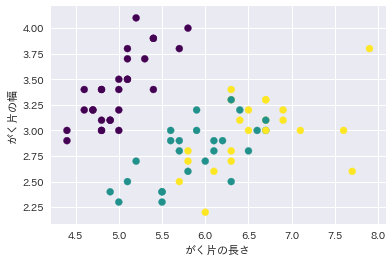

In [13]:
#例 trainデータの "がく片の長さ" と "がく片の幅"

# 解説
plt.scatter(
      x_train["がく片の長さ"]
    , x_train["がく片の幅"]
    , c = y_train["種類"]
    , cmap = "viridis"
)

# 解説
plt.xlabel("がく片の長さ")

# 解説
plt.ylabel("がく片の幅")

# 解説
plt.show()

### 練習問題2
x軸に「花びらの長さ」、y軸に「がく片の幅」をとったグラフ  
x軸に「がく片の長さ」、y軸に「花びらの長さ」をとったグラフ   
をplotしてみよう。

In [14]:
#"花びらの長さ"と "がく片の幅" 
plt.scatter(
      x_train["ここに列名を入れて下さい"]
    , x_train["ここに列名を入れて下さい"]
    , c = y_train["ここに何で色分けするか入れて下さい"]
    , cmap = "viridis"
)

# 解説
plt.xlabel("x軸の列名を入れて下さい")

# 解説
plt.ylabel("y軸の列名を入れて下さい")

# 解説
plt.show()

KeyError: ignored

In [0]:
#「がく片の長さ」と「花びらの長さ」のグラフ  をplotして下さい。

## 機械学習させる
学習させるとは、データを機械学習プログラムに読み込ませることで未知のデータセットに対して、予測ができるようにすることです。  
上の図を例にすると、それぞれの点を分ける様な境界線を引くことが目的になってきます。
実際に学習させていく時の流れとしては

1.   機械学習プログラムを作成する
2.   データを学習させる

と言う流れです。

#### Tips
**x_train.loc[:,["列名１","列名２"]]**  
花の特徴を表す量(列のデータ)を2種類抜き出すことができます。  

**ai.fit(訓練データの,訓練データの正解)**  
AIに学習させることができます

### 練習問題3
今回はplotするために列を２つだけ取ります。AIを設定→列を2種類選択→学習と言う流れになります。「がく片の長さ」の列と、「花びらの長さ」の列、正解ラベルをAIに学習させてみましょう。

In [15]:
# 解説
import warnings

# 解説
warnings.filterwarnings('ignore')

# 解説
from sklearn.neural_network import MLPClassifier 

# どんなAIにするかを設定しています。
ai = MLPClassifier()

# 列の選択
x_train = x_train.loc[
      : , ["ここに列名を入れて下さい", "ここに列名を入れて下さい"]
]

#データの学習
ai.fit(特徴を表すデータを入力して下さい, 種類が入ったデータを入力して下さい)

KeyError: ignored

### 練習問題4
今度はAIが自分でうまい境界線を引くことができたか、グラフにplotして確認します。  
def文で定義されている下の関数内の引数を変えてplotしてみましょう。
訓練データに対応する境界線が引けているのかどうかを確認するので、x_train,y_trainを使います。  
row1とrow2には上と同様の列名を使ってください。


In [16]:
# 解説
from matplotlib.colors import ListedColormap

# 解説
from sklearn.neural_network import MLPClassifier as Deeplearning


# ここでどの様に境界を引けたかをplotできる関数を定義しています。
def plot_decision_regions(X, y, classifier = AI, resolution = 0.02, row1 = "ここに列名を入れて下さい", row2 = "ここに列名を入れて下さい"):

    # 領域の色の付け方を設定しています。
    colors = ('red', 'cyan', 'gray' )
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plotの仕方を設定しています。（ここはだいたい読み飛ばしてもらって結構です。）
    x1_min, x1_max = X[row1].min() - 1, X[row1].max() + 1
    
    # 解説
    x2_min, x2_max = X[row2].min() - 1, X[row2].max() + 1
    
    # 解説
    xx1, xx2 = np.meshgrid(
        　　np.arange(x1_min, x1_max, resolution)
        ,　np.arange(x2_min, x2_max, resolution)
    )
    
    # 解説
    grid = np.array(
        [xx1.ravel(), xx2.ravel()]
    ).T
    
    # 解説
    Z = classifier.predict(grid)
    
    # 解説
    Z = Z.reshape(xx1.shape)
    
    # 解説
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    # 解説
    plt.xlim(xx1.min(), xx1.max())
    
    # 解説
    plt.ylim(xx2.min(), xx2.max())
    
    # 解説
    plt.xlabel(row1)
    
    # 解説
    plt.ylabel(row2)
    
    # 解説
    plt.scatter(
          X[row1]
        , X[row2]
        , c = y["種類"]
        , cmap = "viridis"
    )

NameError: ignored

In [0]:
#学習結果をplotしてみます。
plot_decision_regions(x_train, y_train)

# 解説
plt.show()

## 予測する

AIに学習させたら今度は未知のデータを予測していきます。  
「データの読み込み」で、アヤメの全データを、訓練データ（x_train,y_train）と未知のデータ（x_test,y_test）として二つに分割しました。  

訓練データの学習はここまでで終わったので、今度は学習させたAIにx_trainを元にして個体の種類を予測してもらいましょう。   

**＜tips＞**
*設定したAI.predict(予測のもととなるデータ)*
このメソッドでAIで予測することができます。

*設定したAI.score(予測のもととなるデータ,実際の正解データ)*
このメソッドで予測のスコアを出すことができます。

### 練習問題5

実際に予測して下さい。  

1.   未知のデータの列を選択する
2.   predictで予測する
3.   スコアとplotを表示する

#### 未知のデータの列を選択する

In [17]:
#訓練データの時と同じ列名を入力します。
x_test = x_test.loc[:, ["列名を入れて下さい","列名を入れて下さい"]]



KeyError: ignored

#### predictで予測する

In [18]:
#②がく片の長さと花びらの長さを元にして、種類の判定をAIに行ってもらいます。
#.predict()を使ってコーディングして下さい。

y_pred = ここにコーディングして見ましょう

# 解説
print("予測値：{}".format(y_pred))

NameError: ignored

In [0]:
#下に表示されたものが実際の種類です。
#実際の正解と比べてどの程度違いがあるか簡単に見比べてみてください。
ans = np.array(y_test)

# 解説
ans = ans.flatten()

# 解説
print("実際の正解：{}".format(ans))

#### スコアとplotを表示する

In [0]:
# scoreメソッドを使って、スコアを表示させてみましょう。
score = ai.score(データをここに入れて下さい,データをここに入れて下さい)
print("スコア: {:.2f}".format(score))

In [0]:
#plotもしてどの様に分類されているか見てみましょう。
plot_decision_regions(データをここに入れて下さい,データをここに入れて下さい)
plt.show()

## おわりに

お疲れ様でした。これでアヤメのデータ予測は一通り終了です。  
いかがでしたか？  

データ分析の簡単な流れは理解できたでしょうか？  今回の内容は大まかなデータ分析の流れをなぞっただけですが、意外と簡単にデータ予測ができると感じたのではないでしょうか？？  

今日行ったクラス分類をさらに学習していけば、迷惑メールの分類、画像分類などもできるようになります。  

そして画像分類ができれば、手書き文字の認識や人の判別、脳腫瘍の判別、料理の判別など本当に様々なことができるようになります。  

今後AIは研究開発の分野だけでなく、金融、医療、法律などの分野から身近にあるスーパーやコンビニでも使用されていく技術です。  

### アドバンス問題1
今回はMLPClassifierを使いました。  
これはニューラルネットワークを利用したものでデータ数が150個程度の問題の時は通常用いません。  
したがって今度は違う分類器を使って推定してみましょう。  
↓以下のサイトのフローチャートからこのアヤメの分類のデータセットにあった分類器を指定してみましょう。  
http://scikit-learn.org/stable/tutorial/machine_learning_map/

この分類器を使ってスコアとplot出力してみましょう。
sklearnのドキュメントを見ながら、使う分類器をimportするところからやってみましょう。

In [0]:
#スコア

In [0]:
#plot

### アドバンス問題2

ここまででは特徴量を２つ選んで学習させましたが、今度は全ての列のデータを使ってみましょう。  
スコアも出して、どのくらいスコアが変わったか見てみましょう。
plotはしなくて結構です。  
使用するAIはMLPclassifierを使用してください。

In [0]:
#データセット(先ほど列を抽出してしまったのでデータセットを再読み込みしています。)
from sklearn.datasets import load_iris

# 解説
from sklearn.model_selection import train_test_split

# 解説
iris = load_iris()

# 解説
iris_data = pd.DataFrame(iris.data, columns=["がく片の長さ","がく片の幅","花びらの長さ","花びらの幅"])

# 解説
iris_target = pd.DataFrame(iris.target, columns = ["種類"])  

# スライドのx_train,x_test,y_train,y_testに分けています。
# シャッフルして２つにデータを分割しています。
x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size=0.5)

In [0]:
# fitさせてpredictしてscoreを出しましょう。
コーディングしてください

# 解説
y_pred = コーディングしてください

# 解説
score = コーディングしてください

# 解説
print("予測値：{}".format(y_pred))

# 解説
print("スコア: {:.2f}".format(score))

### アドバンス問題３
ここまでで設定するAIの引数には実はdefaultの値が入っていました。  
例えばSVCであればC=1,kernel='rbf'など（詳しくはscikitlearnのdocumentをご覧ください。）
しかし、本当はそのデータにあった最適な分類器(AI)にするためにパラメータを変えなくてはなりません。  
そのためにグリッドサーチという手法があります。
これはパラメータをの組む合わせを全て試して一番スコアの良いものを返す。
という方法があります。
この方法で一番良いパラメータを発見し良いスコアを出すことがこの問題の目標です。

ちなみに`グリッドサーチ`と呼ばれるのは下の様にパラメータを縦と横に並べたときに、その格子点の組み合わせのパラメータをしらみつぶしに試していくからです。

||0.01|0.１|1|10|100
|---|---|---|---|----|----|
|linear|linear, 0.01|linear, 0.1 |linear, 1|linear, 10|linear,100
|rbf|rbf , 0.01|rbf, 0.1|rbf, 1|rbf, 10|rbf, 100|
|sigmoid|sigmoid , 0.01|sigmoid, 0.1|sigmoid, 1|sigmoid, 10|sigmoid, 100|

``` ＜指定＞分類器はSVC、調べるのは以下の２つの組み合わせ。```  
`kernel:'linear''rbf','sigmoid'`  
 `C:[0.01,0.1,1, 10,100]`

**参考サイト**  
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV


In [0]:
# 解説
from sklearn.grid_search import GridSearchCV

# 解説
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.1,1, 10,100]}
#### 以下に記述してください。



####
#ここでは詳しく述べませんが、内部で分割されているので、大元のiris.dataと、iris.targetをfitさせています。

# 解説
clf.fit(iris.data, iris.target)

In [0]:
# .best_params_で最もスコアの良いパラメータを見ることができます。
clf.best_params_

In [0]:
# GridSearchCVの内部で学習が行われているので.scoreでスコアが出せます。
clf.score(x_test,y_test)